# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

# Loading Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# data Exploration

In [4]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

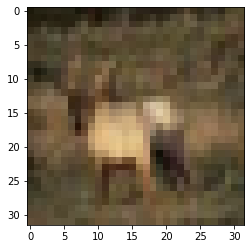

In [387]:
plt.imshow(X_train[3])

In [388]:
y_train[3]

4

In [389]:
labels = {'Airplane':0, 'Automobile':1, 'Bird':2, 'Cat':3, 'Deer':4, 'Dog':5, 'Frog':6, 'Horse':7, 'Ship':8,'Truck':9}

In [390]:
pd.DataFrame(y_train).value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [527]:
pd.DataFrame(y_test).value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

# Normalising data

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## User Input

In [474]:
labels = dict(zip(labels.values(),labels.keys()))

In [475]:
labels

{0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

In [477]:
from PIL import Image


In [63]:
from keras.models import load_model

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('cnn10.h5')
#dictionary to label all traffic signs class.
classes = {0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
# print(sign_image)

def classify(file_path):
    img = Image.open(file_path)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img1,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    pred = model.predict([img1])[0]
    print(pred)
    #     sign = classes[pred+1]
    sign=classes[max(range(len(pred)), key = lambda x: pred[x])]
    print(sign)
    label.configure(foreground='#011638', text=sign)
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Upload Image to Classify",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\40027784\AppData\Local\Temp\ipykernel_31224\38986147.py", line 44, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\40027784\AppData\Local\Temp\ipykernel_31224\38986147.py", line 32, in classify
    img1=np.array(img)
NameError: name 'np' is not defined


In [10]:
cnn10=load_model('cnn10.h5')

# Model tuning

In [31]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
print(tf.version.VERSION)
import sys
sys.version

Num GPUs Available:  1
2.9.1


'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [10]:
cnn10 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same',
                  input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',
                  input_shape=(32,32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn10.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
cnn10.fit(X_train, y_train, epochs = 15, batch_size=64, validation_data=(X_test, y_test), verbose= 1,callbacks=callback)

Epoch 1/15
782/782 [==============================] - 10s 12ms/step - loss: 1.4126 - accuracy: 0.4853 - val_loss: 1.1102 - val_accuracy: 0.6022
Epoch 2/15
782/782 [==============================] - 9s 12ms/step - loss: 0.9679 - accuracy: 0.6599 - val_loss: 0.9595 - val_accuracy: 0.6637
Epoch 3/15
782/782 [==============================] - 9s 11ms/step - loss: 0.7820 - accuracy: 0.7236 - val_loss: 0.8550 - val_accuracy: 0.7006
Epoch 4/15
782/782 [==============================] - 9s 11ms/step - loss: 0.6587 - accuracy: 0.7688 - val_loss: 0.7479 - val_accuracy: 0.7394
Epoch 5/15
782/782 [==============================] - 9s 11ms/step - loss: 0.5647 - accuracy: 0.8019 - val_loss: 0.7318 - val_accuracy: 0.7527
Epoch 6/15
782/782 [==============================] - 9s 12ms/step - loss: 0.4803 - accuracy: 0.8309 - val_loss: 0.7707 - val_accuracy: 0.7517
Epoch 7/15
782/782 [==============================] - 9s 11ms/step - loss: 0.4101 - accuracy: 0.8576 - val_loss: 0.7619 - val_accuracy: 0.759

In [11]:
cnn10.save('cnn11.h5')

In [13]:
cnn10 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same',
                  input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',
                  input_shape=(32,32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn10.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=3)
cnn10.fit(X_train, y_train, epochs = 10, batch_size=64, validation_data=(X_test, y_test), verbose= 1,callbacks=[lr])

Epoch 1/10
782/782 [==============================] - 10s 12ms/step - loss: 1.4718 - accuracy: 0.4632 - val_loss: 1.1425 - val_accuracy: 0.5945 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 0.9989 - accuracy: 0.6455 - val_loss: 0.9483 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 0.7957 - accuracy: 0.7191 - val_loss: 0.8125 - val_accuracy: 0.7199 - lr: 0.0010
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 0.6663 - accuracy: 0.7679 - val_loss: 0.8434 - val_accuracy: 0.7165 - lr: 0.0010
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.5676 - accuracy: 0.8013 - val_loss: 0.7501 - val_accuracy: 0.7446 - lr: 0.0010
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 0.4876 - accuracy: 0.8298 - val_loss: 0.7406 - val_accuracy: 0.7518 - lr: 0.0010
Epoch 7/10
782/782 [==============================] - 9s 11ms/s

In [14]:
cnn10.save('cnn12.h5')

In [17]:
def scheduler(epoch,lr):
    if epoch not in [5,10,15,20]:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


lr1=tf.keras.callbacks.LearningRateScheduler(scheduler)

In [22]:
cnn10 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same',
                  input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',
                  input_shape=(32,32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn10.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)
lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=2)
h=cnn10.fit(X_train, y_train, epochs = 20, batch_size=64, validation_data=(X_test, y_test), verbose= 1,callbacks=[lr1,callback])

Epoch 1/20
782/782 [==============================] - 10s 12ms/step - loss: 1.4552 - accuracy: 0.4711 - val_loss: 1.0900 - val_accuracy: 0.6058 - lr: 0.0010
Epoch 2/20
782/782 [==============================] - 8s 11ms/step - loss: 0.9759 - accuracy: 0.6561 - val_loss: 0.9335 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.7751 - accuracy: 0.7300 - val_loss: 0.8139 - val_accuracy: 0.7183 - lr: 0.0010
Epoch 4/20
782/782 [==============================] - 8s 11ms/step - loss: 0.6549 - accuracy: 0.7708 - val_loss: 0.7548 - val_accuracy: 0.7397 - lr: 0.0010
Epoch 5/20
782/782 [==============================] - 8s 11ms/step - loss: 0.5542 - accuracy: 0.8048 - val_loss: 0.7322 - val_accuracy: 0.7548 - lr: 0.0010
Epoch 6/20
782/782 [==============================] - 8s 11ms/step - loss: 0.4534 - accuracy: 0.8416 - val_loss: 0.7787 - val_accuracy: 0.7486 - lr: 9.0484e-04
Epoch 7/20
782/782 [==============================] - 8s 11

In [23]:
cnn10.save('cnn13.h5')

In [31]:
cnn10 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn10.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
chk=tf.keras.callbacks.ModelCheckpoint(filepath='Checkpoint2/checkpoint',mode='max',monitor='val_accuracy',
                                       save_best_only=True,save_weights_only=True)
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=1,mode='max')
lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=2)
h=cnn10.fit(X_train, y_train, epochs = 20, batch_size=64, validation_data=(X_test, y_test), verbose= 1,callbacks=[lr1,chk])

Epoch 1/20
782/782 [==============================] - 10s 12ms/step - loss: 1.4231 - accuracy: 0.4813 - val_loss: 1.2220 - val_accuracy: 0.5687 - lr: 0.0010
Epoch 2/20
782/782 [==============================] - 9s 11ms/step - loss: 0.9725 - accuracy: 0.6545 - val_loss: 0.9702 - val_accuracy: 0.6566 - lr: 0.0010
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.7722 - accuracy: 0.7285 - val_loss: 0.8882 - val_accuracy: 0.6866 - lr: 0.0010
Epoch 4/20
782/782 [==============================] - 8s 11ms/step - loss: 0.6507 - accuracy: 0.7717 - val_loss: 0.7384 - val_accuracy: 0.7507 - lr: 0.0010
Epoch 5/20
782/782 [==============================] - 9s 11ms/step - loss: 0.5681 - accuracy: 0.8011 - val_loss: 0.7420 - val_accuracy: 0.7482 - lr: 0.0010
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 0.4623 - accuracy: 0.8371 - val_loss: 0.7375 - val_accuracy: 0.7594 - lr: 9.0484e-04
Epoch 7/20
782/782 [==============================] - 9s 11

In [32]:
result8 = cnn10.predict(X_test)
res8 = np.argmax(result8,axis=1)
res8

313/313 [==============================] - 5s 4ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [33]:
accuracy_score(res8,y_test)

0.7507

In [43]:
cnn10.load_weights('Checkpoint2/checkpoint')

In [44]:
result8 = cnn10.predict(X_test)
res8 = np.argmax(result8,axis=1)
res8

313/313 [==============================] - 1s 4ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [45]:
accuracy_score(res8,y_test)

0.7636

In [46]:
cnn10.save('cnn14.h5')

In [47]:
cnn10 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn10.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=2)
cnn10.fit(X_train, y_train, epochs = 10, batch_size=64, validation_data=(X_test, y_test), verbose= 1,callbacks=[lr])

Epoch 1/10
782/782 [==============================] - 10s 11ms/step - loss: 1.4322 - accuracy: 0.4764 - val_loss: 1.1480 - val_accuracy: 0.5875 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 0.9581 - accuracy: 0.6618 - val_loss: 0.8540 - val_accuracy: 0.6996 - lr: 0.0010
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 0.7564 - accuracy: 0.7354 - val_loss: 0.7715 - val_accuracy: 0.7345 - lr: 0.0010
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.6348 - accuracy: 0.7777 - val_loss: 0.8119 - val_accuracy: 0.7220 - lr: 0.0010
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.5353 - accuracy: 0.8121 - val_loss: 0.7276 - val_accuracy: 0.7597 - lr: 0.0010
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4549 - accuracy: 0.8395 - val_loss: 0.7426 - val_accuracy: 0.7613 - lr: 0.0010
Epoch 7/10
782/782 [==============================] - 9s 11ms/s

In [48]:
cnn10.save('cnn15.h5')

# Testing

In [76]:
tf.config.experimental.reset_memory_stats(
    'GPU:0'
)

In [77]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [78]:
tf.keras.backend.clear_session()

# Continue

In [50]:
cnn10 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn10.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
chk=tf.keras.callbacks.ModelCheckpoint(filepath='Checkpoint3/checkpoint',mode='max',monitor='val_accuracy',
                                       save_best_only=True,save_weights_only=True)
lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=2)
cnn10.fit(X_train, y_train, epochs = 20, batch_size=64, validation_data=(X_test, y_test), verbose= 1,callbacks=[lr,chk])

Epoch 1/20
782/782 [==============================] - 10s 12ms/step - loss: 1.4118 - accuracy: 0.4881 - val_loss: 1.1155 - val_accuracy: 0.6079 - lr: 0.0010
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 0.9567 - accuracy: 0.6636 - val_loss: 0.9193 - val_accuracy: 0.6721 - lr: 0.0010
Epoch 3/20
782/782 [==============================] - 9s 12ms/step - loss: 0.7728 - accuracy: 0.7293 - val_loss: 0.8291 - val_accuracy: 0.7147 - lr: 0.0010
Epoch 4/20
782/782 [==============================] - 9s 11ms/step - loss: 0.6518 - accuracy: 0.7716 - val_loss: 0.7622 - val_accuracy: 0.7398 - lr: 0.0010
Epoch 5/20
782/782 [==============================] - 9s 11ms/step - loss: 0.5532 - accuracy: 0.8048 - val_loss: 0.7748 - val_accuracy: 0.7404 - lr: 0.0010
Epoch 6/20
782/782 [==============================] - 9s 12ms/step - loss: 0.4730 - accuracy: 0.8339 - val_loss: 0.7573 - val_accuracy: 0.7540 - lr: 0.0010
Epoch 7/20
782/782 [==============================] - 9s 11ms/s

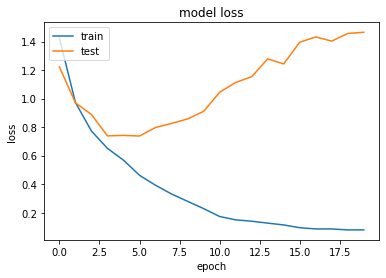

In [51]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
cnn10.load_weights('Checkpoint3/checkpoint')

In [53]:
result9 = cnn10.predict(X_test)
res9 = np.argmax(result9,axis=1)
accuracy_score(y_test,res9)

313/313 [==============================] - 1s 4ms/step


0.779

In [54]:
cnn10.save('cnn16.h5')

In [9]:
cnn10 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation="relu",kernel_initializer='he_uniform',padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn10.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
chk=tf.keras.callbacks.ModelCheckpoint(filepath='Checkpoint4/checkpoint',mode='max',monitor='val_accuracy',
                                       save_best_only=True,save_weights_only=True)
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=2)
cnn10.fit(X_train, y_train, epochs = 20, batch_size=64, validation_data=(X_test, y_test), verbose= 1,callbacks=[lr,chk,callback])

Epoch 1/20
782/782 [==============================] - 10s 12ms/step - loss: 1.4675 - accuracy: 0.4666 - val_loss: 1.1527 - val_accuracy: 0.5899 - lr: 0.0010
Epoch 2/20
782/782 [==============================] - 9s 11ms/step - loss: 0.9975 - accuracy: 0.6496 - val_loss: 0.9582 - val_accuracy: 0.6734 - lr: 0.0010
Epoch 3/20
782/782 [==============================] - 9s 11ms/step - loss: 0.7927 - accuracy: 0.7237 - val_loss: 0.7878 - val_accuracy: 0.7263 - lr: 0.0010
Epoch 4/20
782/782 [==============================] - 9s 11ms/step - loss: 0.6632 - accuracy: 0.7674 - val_loss: 0.7892 - val_accuracy: 0.7282 - lr: 0.0010
Epoch 5/20
782/782 [==============================] - 9s 11ms/step - loss: 0.5630 - accuracy: 0.8043 - val_loss: 0.7500 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 0.4814 - accuracy: 0.8318 - val_loss: 0.7837 - val_accuracy: 0.7448 - lr: 0.0010
Epoch 7/20
782/782 [==============================] - 9s 11ms/s

In [10]:
cnn10.save('cnn17.h5')

# Hyperparameter tuning 

In [13]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [30]:
def build_model(hp):
    model=Sequential()
    
    #Buiding the convolutional layer
    model.add(Conv2D(filters=32,kernel_size=hp.Choice('kernel_size_1',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(Conv2D(filters=32,kernel_size=hp.Choice('kernel_size_2',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_1',values=[2,3])))
    
    #2nd 
    model.add(Conv2D(filters=64,kernel_size=hp.Choice('kernel_size_3',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(Conv2D(filters=64,kernel_size=hp.Choice('kernel_size_4',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_2',values=[2,3]))) 
    
    #3rd
    model.add(Conv2D(filters=128,kernel_size=hp.Choice('kernel_size_5',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(Conv2D(filters=128,kernel_size=hp.Choice('kernel_size_6',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_3',values=[2,3])))
    
    #Flattening the feature map
    model.add(Flatten())

    #Adding ANN layers 
    model.add(Dense(units=hp.Int('Unit_1',min_value=64,max_value=256,step=16),activation='relu'))
   
    #adding the final layer
    model.add(Dense(units=10,activation='softmax'))

    #compiling the model
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [31]:
tuner=RandomSearch(build_model,
                   objective='val_accuracy',
                   max_trials=3,overwrite=True
                  )

In [32]:
tuner.search(X_train,y_train,epochs=3,validation_split=0.2,verbose=2)

Trial 3 Complete [00h 00m 41s]
val_accuracy: 0.7350000143051147

Best val_accuracy So Far: 0.7350000143051147
Total elapsed time: 00h 02m 02s
INFO:tensorflow:Oracle triggered exit


In [36]:
model=tuner.get_best_models(num_models=1)[0]

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [38]:
answer=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6262 - accuracy: 0.7819 - val_loss: 0.7361 - val_accuracy: 0.7467
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5070 - accuracy: 0.8241 - val_loss: 0.7125 - val_accuracy: 0.7646
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.4135 - accuracy: 0.8568 - val_loss: 0.7506 - val_accuracy: 0.7561
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.3370 - accuracy: 0.8822 - val_loss: 0.8394 - val_accuracy: 0.7567
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2780 - accuracy: 0.9028 - val_loss: 0.8364 - val_accuracy: 0.7599
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2320 - accuracy: 0.9185 - val_loss: 0.8875 - val_accuracy: 0.7623
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2038 - accuracy: 0.9292 - val_loss: 0.9710 -

In [39]:
model.save('hyp1cnn10.h5')

In [40]:
def build_model(hp):
    model=Sequential()
    #Buiding the convolutional layer
    model.add(Conv2D(filters=hp.Int('filter_1',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_1',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(Conv2D(filters=hp.Int('filter_2',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_2',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_1',values=[2,3])))
    
    #2nd 
    model.add(Conv2D(filters=hp.Int('filter_3',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_3',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(Conv2D(filters=hp.Int('filter_4',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_4',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_2',values=[2,3]))) 
    
    #3rd
    model.add(Conv2D(filters=hp.Int('filter_5',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_5',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(Conv2D(filters=hp.Int('filter_6',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_6',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_3',values=[2,3])))
    
    #Flattening the feature map
    model.add(Flatten())
    #Adding ANN layers 
    model.add(Dense(units=hp.Int('Unit_1',min_value=64,max_value=256,step=16),activation='relu'))
    #adding the final layer
    model.add(Dense(units=10,activation='softmax'))
    #compiling the model
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [42]:
tuner=RandomSearch(build_model,
                   objective='val_accuracy',
                   max_trials=3,
                   overwrite=True
                  )
tuner.search(X_train,y_train,epochs=3,validation_data=(X_test,y_test),verbose=2)

Trial 3 Complete [00h 01m 34s]
val_accuracy: 0.6669999957084656

Best val_accuracy So Far: 0.7419999837875366
Total elapsed time: 00h 04m 03s
INFO:tensorflow:Oracle triggered exit


In [46]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       102528    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 144)       166032    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 224)       806624    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 224)        0         
 2D)                                                    

In [47]:
chk=tf.keras.callbacks.ModelCheckpoint(filepath='Checkpoint5/checkpoint',mode='max',monitor='val_accuracy',
                                       save_best_only=True,save_weights_only=True)
answer=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=chk)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5772 - accuracy: 0.8011 - val_loss: 0.7109 - val_accuracy: 0.7572
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.4693 - accuracy: 0.8380 - val_loss: 0.6823 - val_accuracy: 0.7727
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.3814 - accuracy: 0.8673 - val_loss: 0.7452 - val_accuracy: 0.7682
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.3135 - accuracy: 0.8895 - val_loss: 0.9798 - val_accuracy: 0.7343
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.2630 - accuracy: 0.9096 - val_loss: 0.8945 - val_accuracy: 0.7564
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.2282 - accuracy: 0.9219 - val_loss: 0.8714 - val_accuracy: 0.7642
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.1992 - accuracy: 0.9318 - val_loss: 0.9830 -

In [49]:
model.save('hyp2cnn10.h5')

In [56]:
def build_model(hp):
    model=Sequential()

    #Buiding the convolutional layer
    model.add(Conv2D(filters=hp.Int('filter_1',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_1',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(Conv2D(filters=hp.Int('filter_2',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_2',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_1',values=[2,3])))
    
    #2nd 
    model.add(Conv2D(filters=hp.Int('filter_3',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_3',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(Conv2D(filters=hp.Int('filter_4',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_4',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_2',values=[2,3]))) 
    
    #3rd
    model.add(Conv2D(filters=hp.Int('filter_5',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_5',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(Conv2D(filters=hp.Int('filter_6',min_value=16,max_value=256,step=16),
                     kernel_size=hp.Choice('kernel_size_6',values=[3,5]),
                     kernel_initializer='he_uniform',padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_3',values=[2,3])))
    
    

    #Flattening the feature map
    model.add(Flatten())

    #Adding ANN layers 
    model.add(Dense(units=hp.Int('Unit_1',min_value=64,max_value=256,step=16),activation='relu'))
   
    #adding the final layer
    model.add(Dense(units=10,activation='softmax'))
    
    adam=tf.keras.optimizers.Adam(learning_rate=hp.Choice('leraning_rate1',values=[0.01,0.001,0.0001,1.0e-5,1.0e-6]))
    #compiling the model
    model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [57]:
tuner=RandomSearch(build_model,
                   objective='val_accuracy',
                   max_trials=3,
                   overwrite=True
                  )
tuner.search(X_train,y_train,epochs=3,validation_data=(X_test,y_test),verbose=2)

Trial 3 Complete [00h 01m 05s]
val_accuracy: 0.33500000834465027

Best val_accuracy So Far: 0.33500000834465027
Total elapsed time: 00h 04m 36s
INFO:tensorflow:Oracle triggered exit


In [70]:
def build_model(hp):
    model=load_model('cnn15.h5')
    adam=tf.keras.optimizers.Adam(learning_rate=hp.Choice('leraning_rate1',values=[0.01,0.001,0.0001,1.0e-5,1.0e-6,
                                                                                   1.0e-7,1.0e-8]))
    model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

tuner=RandomSearch(build_model,
                   objective='val_accuracy',
                   max_trials=7,
                   overwrite=True
                  )
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=2)

Trial 6 Complete [00h 02m 40s]
val_accuracy: 0.7914999723434448

Best val_accuracy So Far: 0.7914999723434448
Total elapsed time: 00h 16m 24s
INFO:tensorflow:Oracle triggered exit


In [71]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_103 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 10, 10, 64)        18496     
                                                                 
 conv2d_105 (Conv2D)         (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                

In [72]:
model.save('hyp3cnn15.h5')

In [79]:
cnn15=load_model('cnn15.h5')
hypcnn15=load_model('hyp3cnn15.h5')

In [80]:
result9 = cnn15.predict(X_test)
res9 = np.argmax(result9,axis=1)
accuracy_score(y_test,res9)

313/313 [==============================] - 5s 5ms/step


0.7908

In [81]:
result9 = hypcnn15.predict(X_test)
res9 = np.argmax(result9,axis=1)
accuracy_score(y_test,res9)

313/313 [==============================] - 1s 4ms/step


0.7915

In [3]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('hyp3cnn15.h5')
#dictionary to label all traffic signs class.
classes = {0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image classification')
top.configure(background='#0000FF')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
# print(sign_image)

def classify(file_path):
    img = Image.open(file_path)
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img1,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    pred = model.predict([img1])[0]
    print(pred)
    #     sign = classes[pred+1]
    sign=classes[max(range(len(pred)), key = lambda x: pred[x])]
    print(sign)
    label.configure(foreground='#011638', text=sign)
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Upload Image to Classify",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\40027784\AppData\Local\Temp\ipykernel_31224\2267754497.py", line 44, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\40027784\AppData\Local\Temp\ipykernel_31224\2267754497.py", line 32, in classify
    img1=np.array(img)
NameError: name 'np' is not defined
